<font face="Times New Roman" size=5>
<div dir=rtl align="center">
<font face="Times New Roman" size=5>
In The Name of God
</font>
<br>
<img src="https://logoyar.com/content/wp-content/uploads/2021/04/sharif-university-logo.png" alt="University Logo" width="150" height="150">
<br>
<font face="Times New Roman" size=4 align=center>
Sharif University of Technology - Department of Electrical Engineering
</font>
<br>
<font color="#008080" size=6>
Machine Vision Learning
</font>
<hr/>
<font color="#800080" size=5>
LAB 7 : LBP,Gabor and HOG
<br>
</font>
<font size=5>
Instructor: Dr. H. Mohammad Zadeh
<br>
</font>
<font size=4>
Fall 2024
<br>
</font>
<font face="Times New Roman" size=4>
</font>

</div></font>

In [1]:
Name = "Ali Sadeghian"
SN = "400101464"

## Introduction


Local Binary Patterns (LBP), Gabor filters, and Histogram of Oriented Gradients (HOG) are widely used feature extraction techniques in image processing and computer vision. LBP is primarily employed for texture classification and pattern recognition, capturing local spatial variations and intensity differences in an image. Gabor filters, inspired by the human visual system, are effective for texture and frequency analysis, making them valuable for applications such as texture segmentation, fingerprint recognition, and biometrics. HOG, on the other hand, is extensively used in object detection, particularly for identifying humans in images, as it focuses on capturing the structural and edge information of objects through gradient orientation analysis. Together, these methods play a significant role in enhancing the performance of various computer vision tasks by providing meaningful representations of visual data.

## Libraries

In [2]:
import cv2
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import random
import zipfile
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern
from skimage.io import imread
from skimage.color import rgb2gray
import cv2
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from skimage.feature import hog
import random

d:\Anaconda\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


## Reading data

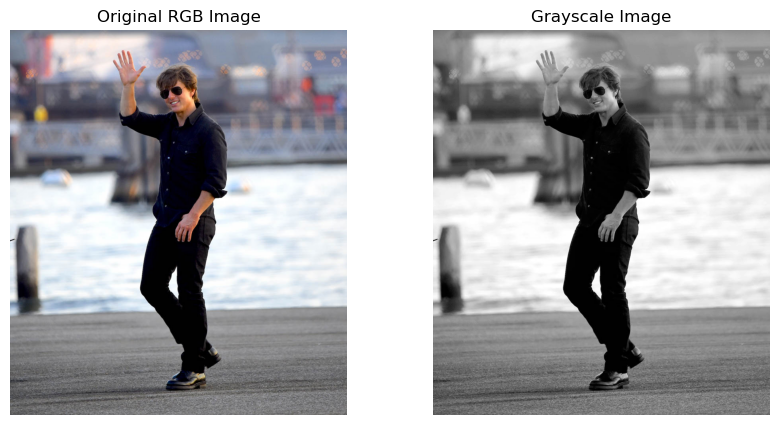

In [3]:
# Specify the relative path where the images are located
input_folder = "./"  

# List to store grayscale images
gray_images = []
rgb_images = []
# Get a list of all image files in the specified folder
image_files = glob.glob(os.path.join(input_folder, "*.jpg"))  # Adjust extension if needed

for image_file in image_files:
    # Read the image in RGB format
    image_rgb = cv2.imread(image_file)

    # Convert the RGB image to grayscale
    image_gray = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2GRAY)

    # Append the rgb and grayscale images to the lists
    rgb_images.append(image_rgb)
    gray_images.append(image_gray)

    # Display the original and grayscale images
    plt.figure(figsize=(10, 5))

    # Show the original image
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image_rgb, cv2.COLOR_BGR2RGB))
    plt.title("Original RGB Image")
    plt.axis("off")

    # Show the grayscale image
    plt.subplot(1, 2, 2)
    plt.imshow(image_gray, cmap='gray')
    plt.title("Grayscale Image")
    plt.axis("off")

    plt.show()

In [4]:
# Function to read images from a zip file and convert them to grayscale
def read_images_from_zip(zip_file_path, folder_in_zip):
    gray_images = []

    # Open the zip file
    with zipfile.ZipFile(zip_file_path, 'r') as archive:
        # Filter PNG files within the specified folder
        file_list = [f for f in archive.namelist() if f.startswith(folder_in_zip) and f.endswith(".png")]

        # Read each image and convert to grayscale
        for file in file_list:
            with archive.open(file) as img_file:
                file_bytes = np.frombuffer(img_file.read(), np.uint8)
                img = cv2.imdecode(file_bytes, cv2.IMREAD_COLOR)
                gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                gray_images.append(gray_img)

    return gray_images

# Define paths for image datasets in the zip file
zip_file_path = 'data_set_image.zip'
happy_in_zip = 'happy/'
disgust_in_zip = 'disgust/'


gray_images_happy = read_images_from_zip(zip_file_path, happy_in_zip)
gray_images_disgust = read_images_from_zip(zip_file_path, disgust_in_zip)


# Check if images were found in each category and print a message if not
if len(gray_images_happy) == 0:
    print("No images found in the specified folder Happy.")
if len(gray_images_disgust) == 0:
    print("No images found in the specified folder Disgust.")


In [5]:
# Function to create an elliptical mask for face detection
def mask_face_ellipse(image, width_factor=0.8, height_factor=0.6):
    height, width = image.shape
    center_x, center_y = width // 2, height // 2
    axis_x = int(width // 2 * width_factor)
    axis_y = int(height // 2 * height_factor)

    # Create a mask using an ellipse
    mask = np.zeros_like(image, dtype=np.uint8)
    cv2.ellipse(mask, (center_x, center_y), (axis_x, axis_y), 0, 0, 360, 255, thickness=-1)

    # Apply the mask to the image
    masked_image = cv2.bitwise_and(image, image, mask=mask)
    return masked_image

# Function to mask a dataset of images using an elliptical mask
def mask_dataset_ellipse(dataset, width_factor=0.8, height_factor=0.6):
    masked_dataset = []
    for image in dataset:
        masked_image = mask_face_ellipse(image, width_factor, height_factor)
        masked_dataset.append(masked_image)
    return masked_dataset

In [6]:
gray_image_h_m = mask_dataset_ellipse(gray_images_happy)
gray_image_d_m = mask_dataset_ellipse(gray_images_disgust)

In [7]:

# Function to display a set of images
def plot_images(images, n, title=None):
    plt.figure(figsize=(10, 10))
    for i in range(n):
        plt.subplot(1, n, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.axis('off')
    if title is not None:
        plt.title(title, fontsize=16)  # Use suptitle for centered title
    plt.tight_layout()
    plt.show()

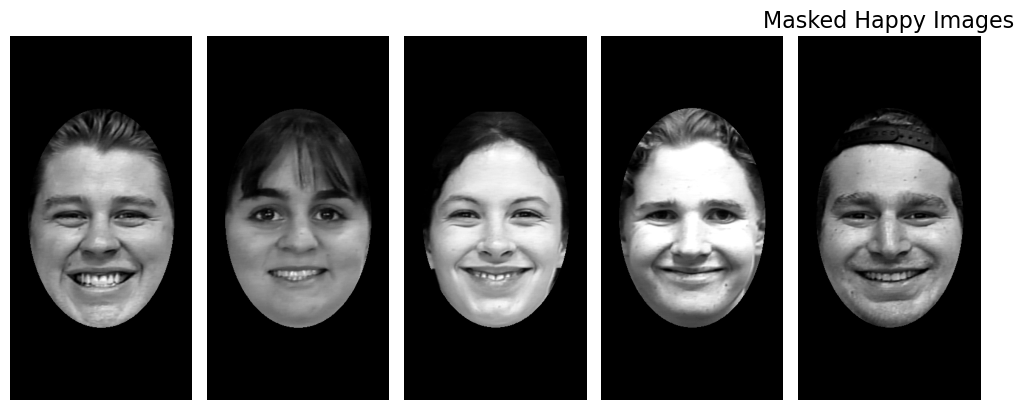

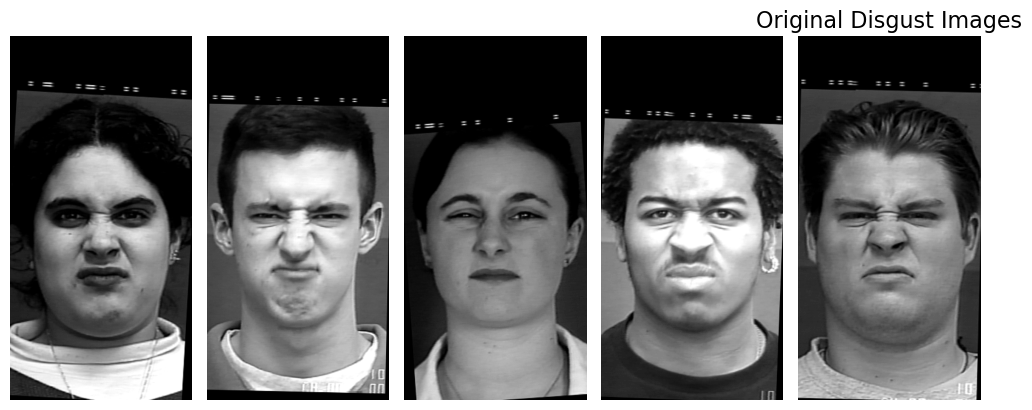

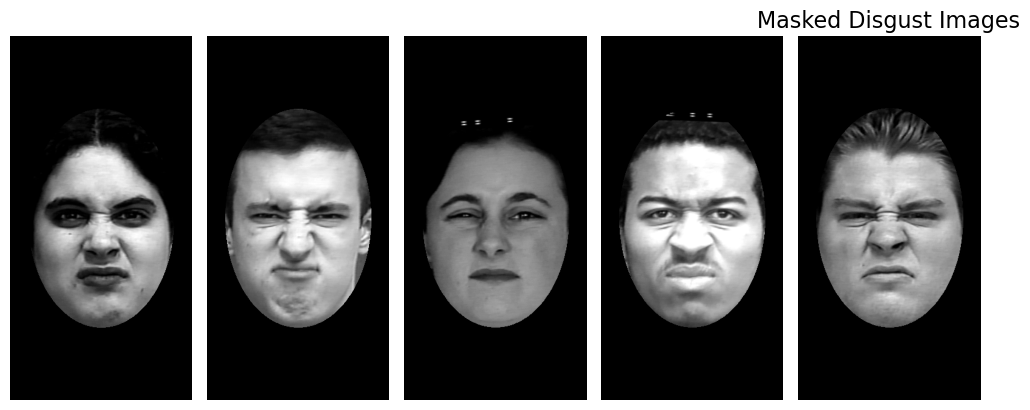

In [8]:
n_images_to_plot = 5
# Plot original and masked images for Happy emotions
plot_images(gray_images_happy, n_images_to_plot,'Original Happy Images')
plot_images(gray_image_h_m, n_images_to_plot,'Masked Happy Images')
# Plot original and masked images for Disgust emotions
plot_images(gray_images_disgust, n_images_to_plot,'Original Disgust Images')
plot_images(gray_image_d_m, n_images_to_plot,'Masked Disgust Images')

## LBP

Local Binary Patterns (LBP) is a powerful feature extraction technique used in texture classification and computer vision. It is designed to capture local spatial patterns and intensity variations within an image by encoding the relationship between a central pixel and its neighbors into a binary number. The process involves comparing the gray-level value of each neighboring pixel with the central pixel. If the neighbor's value is greater than or equal to the central pixel, it is encoded as 1; otherwise, it is encoded as 0. These binary values are concatenated to form a unique binary number, which is then converted into a decimal representation, called the LBP value.

### Mathematical Definition of LBP
For a pixel $ I_c $ at position $ (x, y) $ in an image, the LBP value is computed as:

$$
\text{LBP}_{P,R}(x, y) = \sum_{p=0}^{P-1} s(I_p - I_c) \cdot 2^p
$$

Here:
- $ P $ is the number of neighbors.
- $ R $ is the radius of the circular neighborhood.
- $ I_p $ represents the intensity of the % p %-th neighboring pixel.
- $ s(x) $ is a step function defined as:
$$
  s(x) = 
  \begin{cases} 
  1 & \text{if } x \geq 0 \\ 
  0 & \text{if } x < 0 
  \end{cases}
$$

The neighbors are sampled in a circular pattern around $ I_c $, and interpolation may be used if the sampling points fall between pixels.

### Variants of LBP
1. **Default LBP:** Computes the basic binary pattern without any transformations or optimizations.  
2. **Uniform LBP:** Simplifies the representation by counting only binary patterns with at most two transitions (e.g., 00011100). This reduces the number of distinct patterns to $ P + 2 $, enhancing robustness and reducing computational complexity.  
3. **Rotation-Invariant (ROR):** Considers patterns equivalent under rotation to further reduce redundancy, ensuring invariance to image orientation.  
4. **Non-Rotation-Invariant Uniform (NRI Uniform):** Combines uniformity with detailed, non-rotation-invariant patterns, resulting in more descriptive histograms.

### LBP Histogram
Once the LBP values are computed for all pixels, a histogram is constructed to represent the frequency of each LBP value. The histogram serves as a texture descriptor for the image, enabling its use in classification tasks. For a specific LBP method:
- The number of bins in the histogram depends on the method (e.g., $ P+2 $ for uniform patterns, $ 2^P $ for default patterns).

### Applications of LBP
LBP is widely used in texture classification, face recognition, object detection, and medical image analysis due to its simplicity, efficiency, and invariance to monotonic gray-level changes. The ability to adapt to various methods makes it versatile for a range of computer vision tasks.


Computing LBP with method=default, P=8, R=1


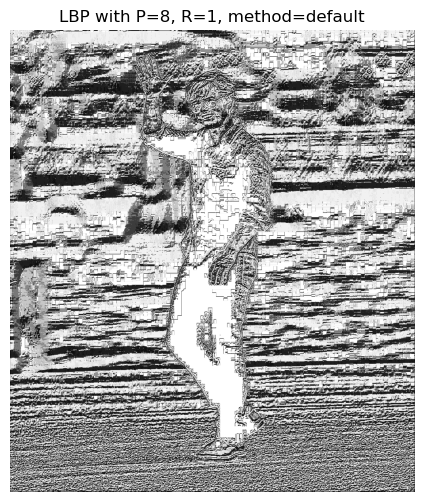

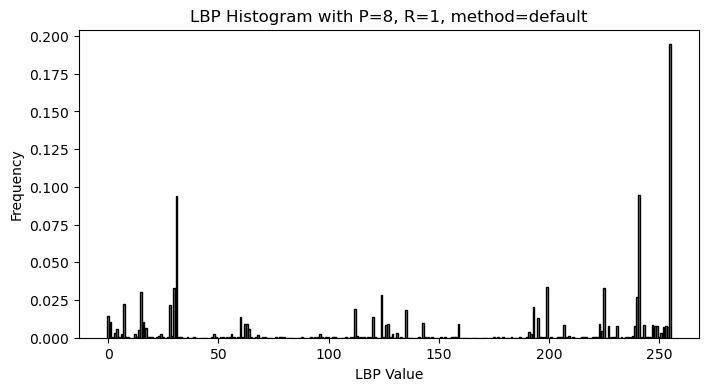


Computing LBP with method=ror, P=8, R=1


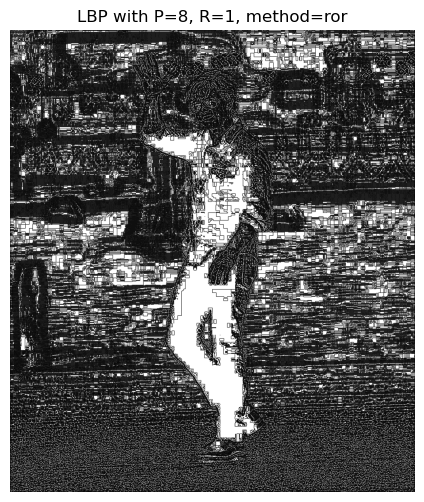

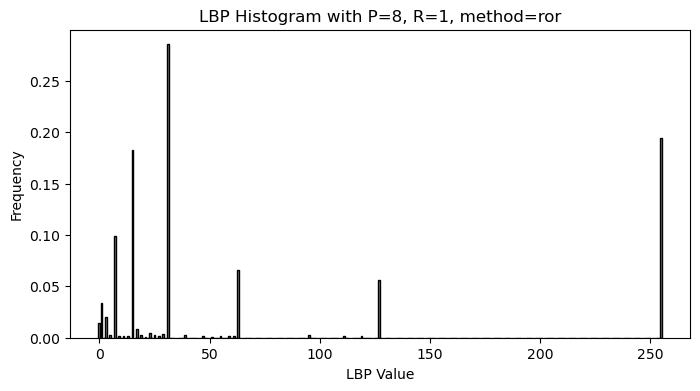


Computing LBP with method=uniform, P=8, R=1


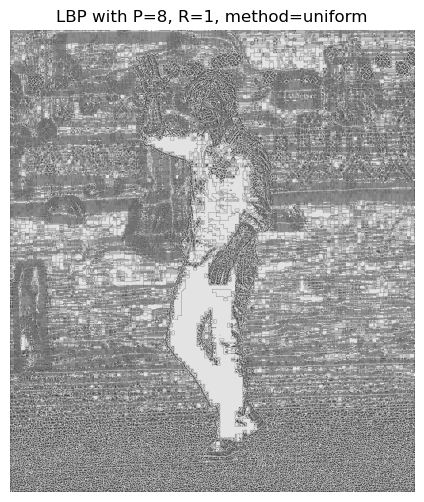

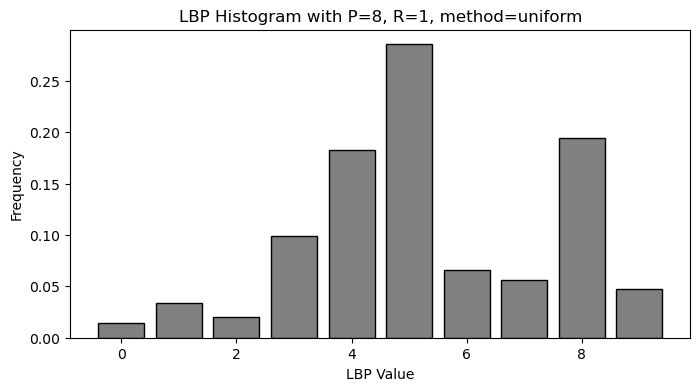


Computing LBP with method=nri_uniform, P=8, R=1


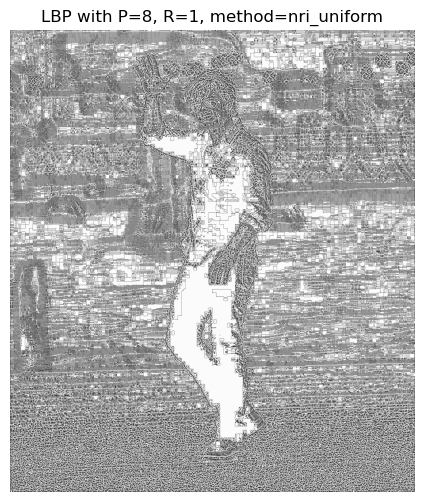

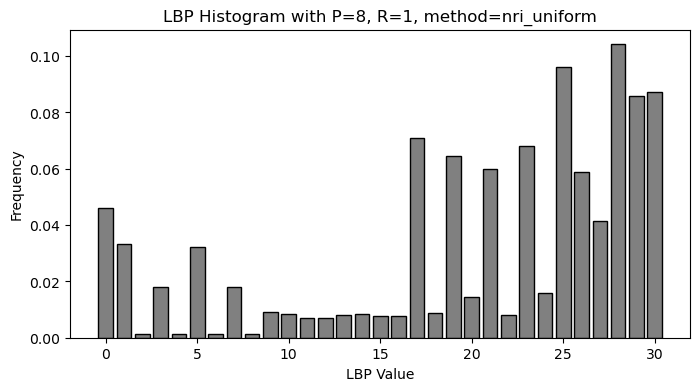


Computing LBP with method=default, P=24, R=3


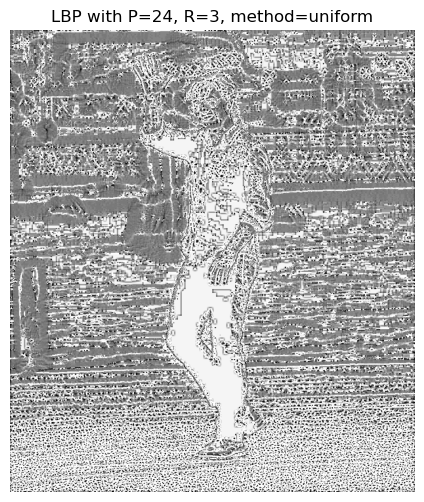

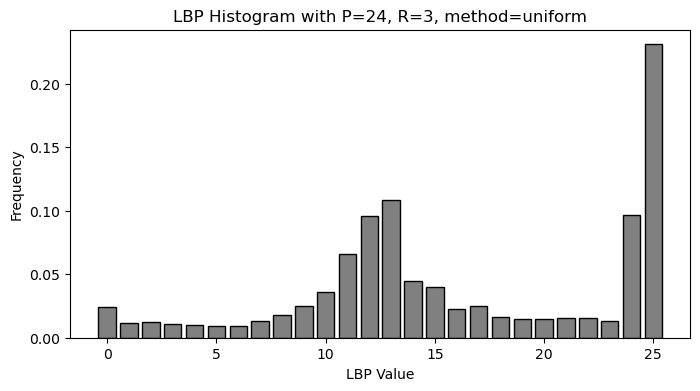

In [9]:
# Load and preprocess the image
image = gray_images[0]

# Function to compute LBP and plot histogram
def compute_and_plot_lbp(image, P, R, method):
    lbp = local_binary_pattern(image, P, R, method=method)

    # Display LBP image
    plt.figure(figsize=(6, 6))
    plt.imshow(lbp, cmap='gray')
    plt.title(f'LBP with P={P}, R={R}, method={method}')
    plt.axis('off')
    plt.show()

    # Determine the number of bins
    if method == 'uniform':
        n_bins = P + 2
    elif method == 'nri_uniform':
        n_bins = (P * (P - 1)) // 2 + 3
    else:
        n_bins = 2**P

    # Compute and plot histogram
    hist, bins = np.histogram(lbp.ravel(), bins=np.arange(0, n_bins + 1), range=(0, n_bins))
    hist = hist.astype("float") / hist.sum()  # Normalize the histogram

    plt.figure(figsize=(8, 4))
    plt.bar(bins[:-1], hist, width=0.8, color='gray', edgecolor='black')
    plt.title(f'LBP Histogram with P={P}, R={R}, method={method}')
    plt.xlabel('LBP Value')
    plt.ylabel('Frequency')
    plt.show()

    return lbp, hist

# Parameters
methods = ['default', 'ror', 'uniform', 'nri_uniform']
P1, R1 = 8, 1
P2, R2 = 24, 3

# 1. Compute LBP with P=8, R=1 for different methods
for method in methods:
    print(f"\nComputing LBP with method={method}, P={P1}, R={R1}")
    lbp, hist = compute_and_plot_lbp(image, P1, R1, method)

# 2. Compute LBP with P=24, R=3, method=default
print(f"\nComputing LBP with method=default, P={P2}, R={R2}")
lbp, hist = compute_and_plot_lbp(image, P2, R2, method='uniform')


### Analysis for Different `method` Values:
1. **Default**:
   - In the `default` method, the LBP values represent all possible binary patterns generated from $ 2^P $ combinations of $ P $ neighbors.  
   - For $ P=8 $, the range of the feature vector spans $ [0, 255] $ (as $ 2^8 = 256 $).
   - For $ P=24 $, the range expands significantly to $ [0, 16,777,215] $ (as $ 2^{24} $), but for practical reasons, the values tend to cluster near certain patterns due to the nature of real-world textures.

2. **ROR (Rotation-Invariant)**:
   - The `ror` method generates a rotation-invariant representation by considering equivalent patterns across all circular rotations.
   - This results in fewer unique LBP values compared to `default`. For $ P=8 $, the range reduces significantly, as rotated patterns map to the same value. 

3. **Uniform**:
   - The `uniform` method further reduces the number of patterns by focusing only on uniform patterns (patterns with at most two binary transitions).  
   - For $ P=8 $, this results in $ P+2=10 $ unique values.  
   - For $ P=24 $, there would be $ 24+2=26 $ unique values. This drastic reduction simplifies the histogram and is particularly useful for robust texture analysis.

4. **NRI Uniform**:
   - The `nri_uniform` method retains detailed non-uniform patterns while incorporating uniformity principles.
   - For $ P=8 $, the range increases compared to `uniform` but remains less than $ 2^P $ due to the structured pattern grouping. The exact range can be calculated as $ P(P-1)/2 + 3 $.

---

### Modifying Parameters to $ P=24, R=3, \text{method}=\text{uniform} $:
When $ P=24 $, $ R=3 $, and the `uniform` method is used, the number of bins in the histogram is significantly reduced, making it feasible to plot and analyze. In the `uniform` method, the total number of unique patterns is limited to $ P+2=26 $, representing all uniform patterns and a single bin for non-uniform patterns.

<font color="#800000" size=3>
 The default method generates a vast number of possible LBP patterns, especially for higher values of  P  (e.g.,  P=24 ), where the total possible patterns are  2^{24} . Plotting or processing such high-dimensional data is computationally intensive and memory-demanding. The uniform method reduces the number of patterns to  P+2 , which is significantly smaller and computationally manageable.
</font>

1. **Advantages of Using `uniform`**:
   - The histogram becomes computationally efficient and easier to interpret, as the number of bins is fixed and significantly smaller than $ 2^{24} $.
   - While some texture information is lost by ignoring non-uniform patterns, the representation remains robust for texture classification, as uniform patterns capture the most prominent features.

2. **Differences in the Histogram**:
   - Unlike the default method, which produces a sparse histogram with high-dimensional bins, the `uniform` method condenses the data into a dense histogram with a manageable number of bins (26).
   - The focus shifts from encoding all possible patterns to capturing essential local transitions, which often dominate natural images.


## Gabor


### Definition of Gabor Filters with Mathematical Explanation

Gabor filters are linear filters used for edge detection, texture analysis, and pattern recognition. They are particularly effective for capturing spatial and frequency information, making them a popular choice for analyzing textures and extracting features from images.

A Gabor filter is defined by a sinusoidal plane wave modulated by a Gaussian envelope, making it sensitive to specific orientations and frequencies in an image. Mathematically, the 2D Gabor filter can be expressed as:

$$
G(x, y; \lambda, \theta, \psi, \sigma, \gamma) = \exp\left(-\frac{x'^2 + \gamma^2 y'^2}{2\sigma^2}\right) \cos\left(2\pi \frac{x'}{\lambda} + \psi\right)
$$

where:
- $x' = x \cos\theta + y \sin\theta$ and $y' = -x \sin\theta + y \cos\theta$ are rotated coordinates.
- $\lambda$: Wavelength of the sinusoidal component, determining the filter's frequency sensitivity.
- $\theta$: Orientation of the Gabor filter, controlling the angle of the wave.
- $\psi$: Phase offset of the sinusoidal wave, which can shift the wave's position.
- $\sigma$: Standard deviation of the Gaussian envelope, controlling the spread of the filter.
- $\gamma$: Aspect ratio, defining the ellipticity of the Gaussian envelope (commonly $0 < \gamma \leq 1$).

### Parameters of Gabor Filters and Their Effects

1. **Wavelength ($\lambda$)**: This determines the frequency of the sinusoidal component. A larger $\lambda$ results in a filter that detects coarser features (low frequency), while a smaller $\lambda$ detects finer features (high frequency).

2. **Orientation ($\theta$)**: The orientation controls the angle of the filter’s sensitivity. Changing $\theta$ allows the filter to detect features (e.g., edges) aligned with different angles.

3. **Standard Deviation ($\sigma$)**: This defines the spread of the Gaussian envelope. A larger $\sigma$ results in a filter sensitive to broader regions, capturing more global features. Conversely, a smaller $\sigma$ focuses on local details.

4. **Aspect Ratio ($\gamma$)**: The aspect ratio defines the shape of the Gaussian envelope. Smaller $\gamma$ values result in elongated filters, making the filter more directional. Larger $\gamma$ values lead to more circular filters, reducing directionality.

5. **Phase Offset ($\psi$)**: The phase offset shifts the sinusoidal component. Common values are $\psi = 0$ (even-symmetric Gabor filter) and $\psi = \pi/2$ (odd-symmetric Gabor filter).


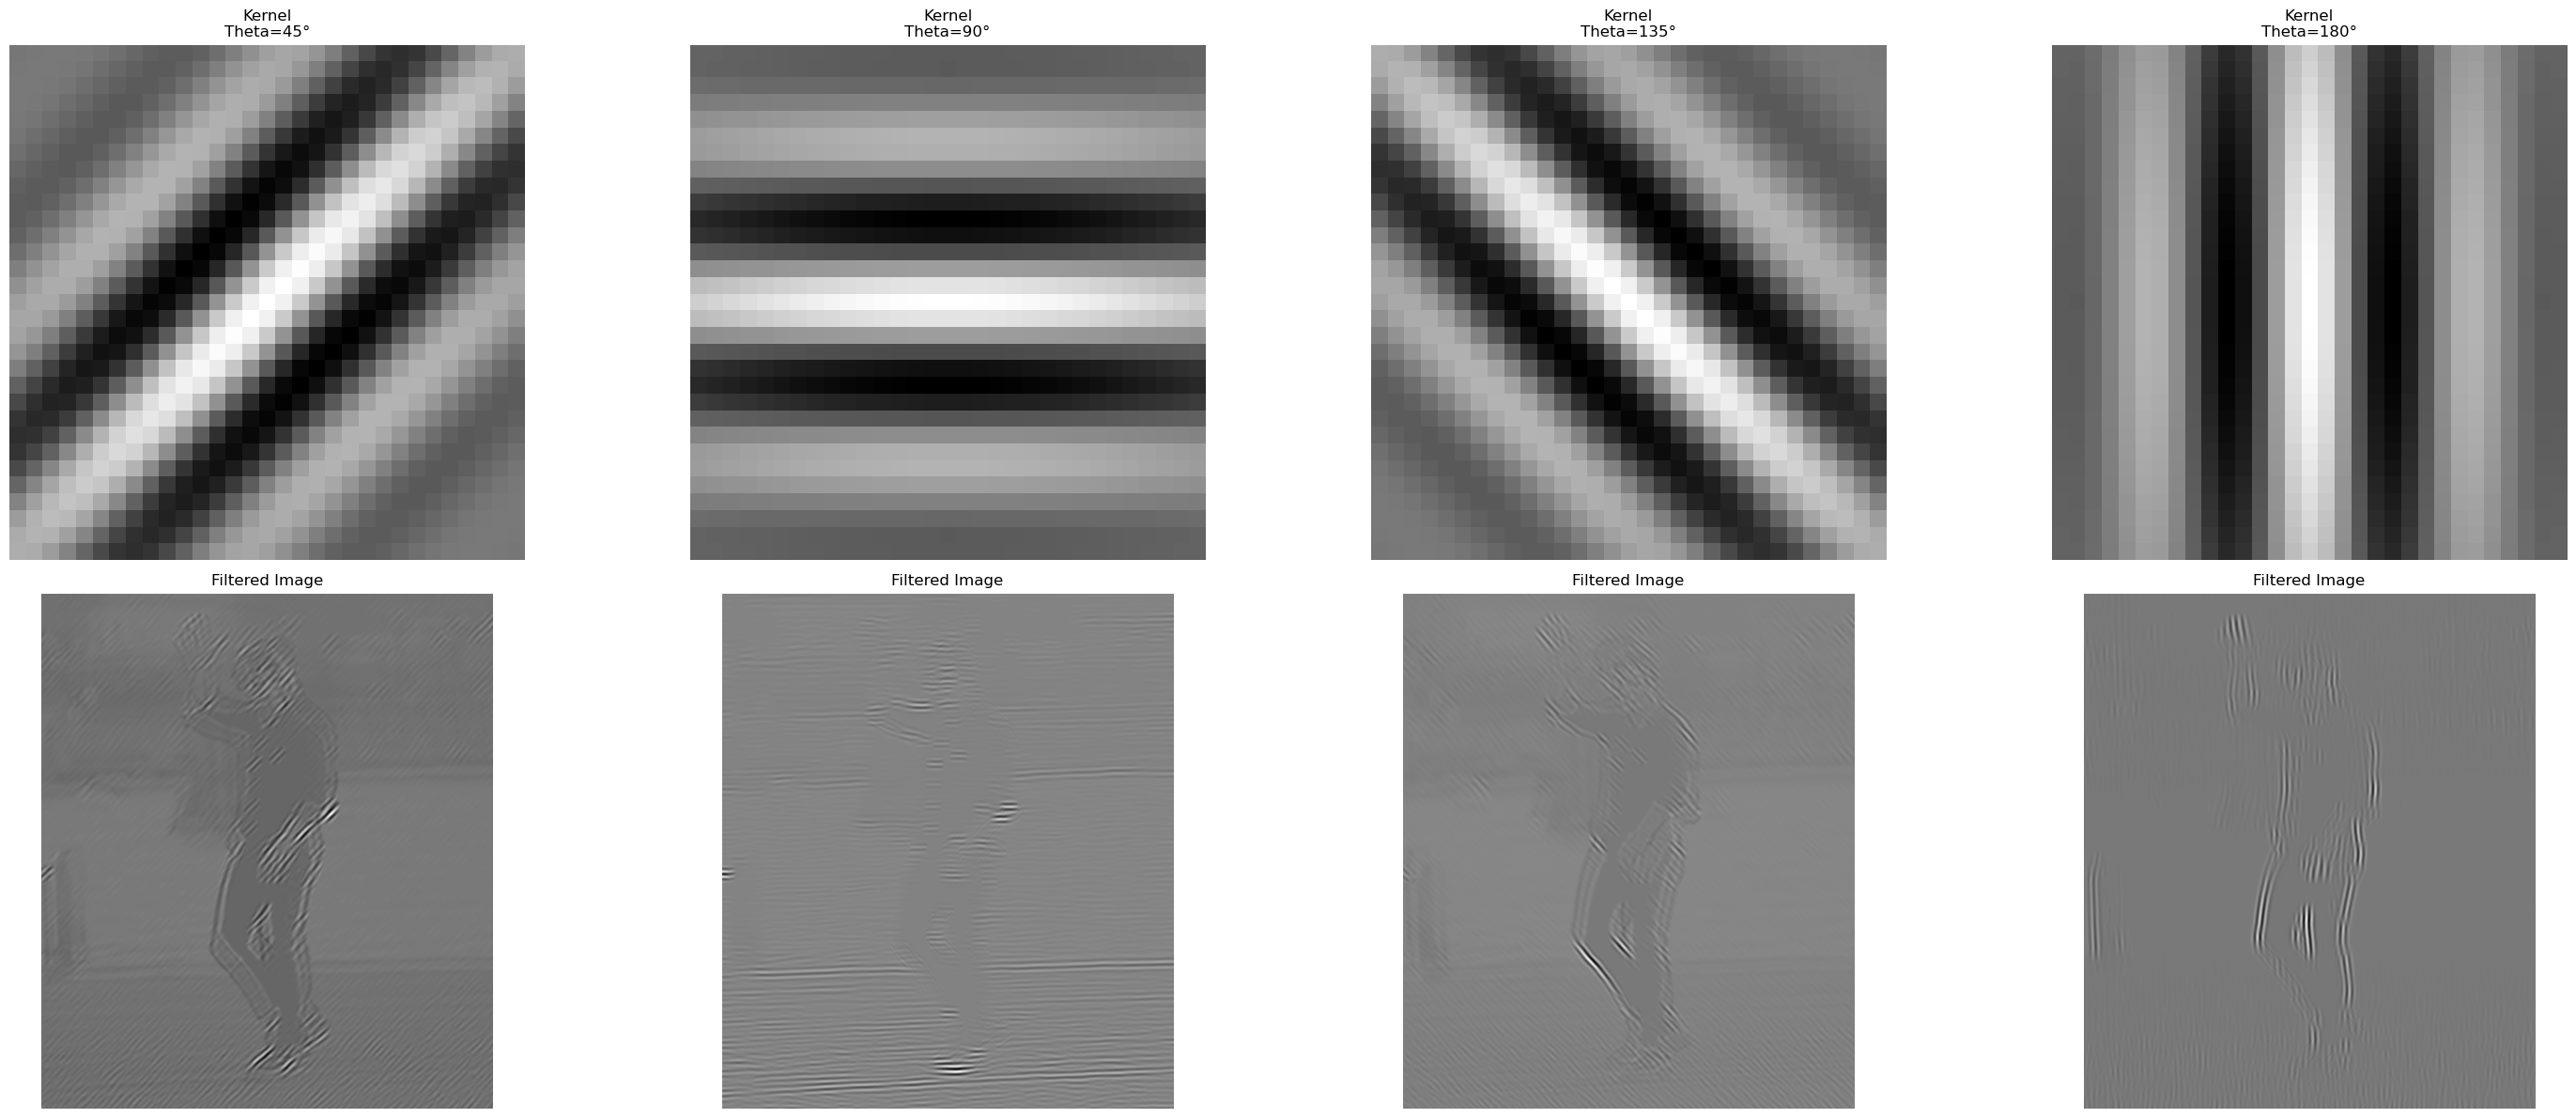


Results for varying sigma:


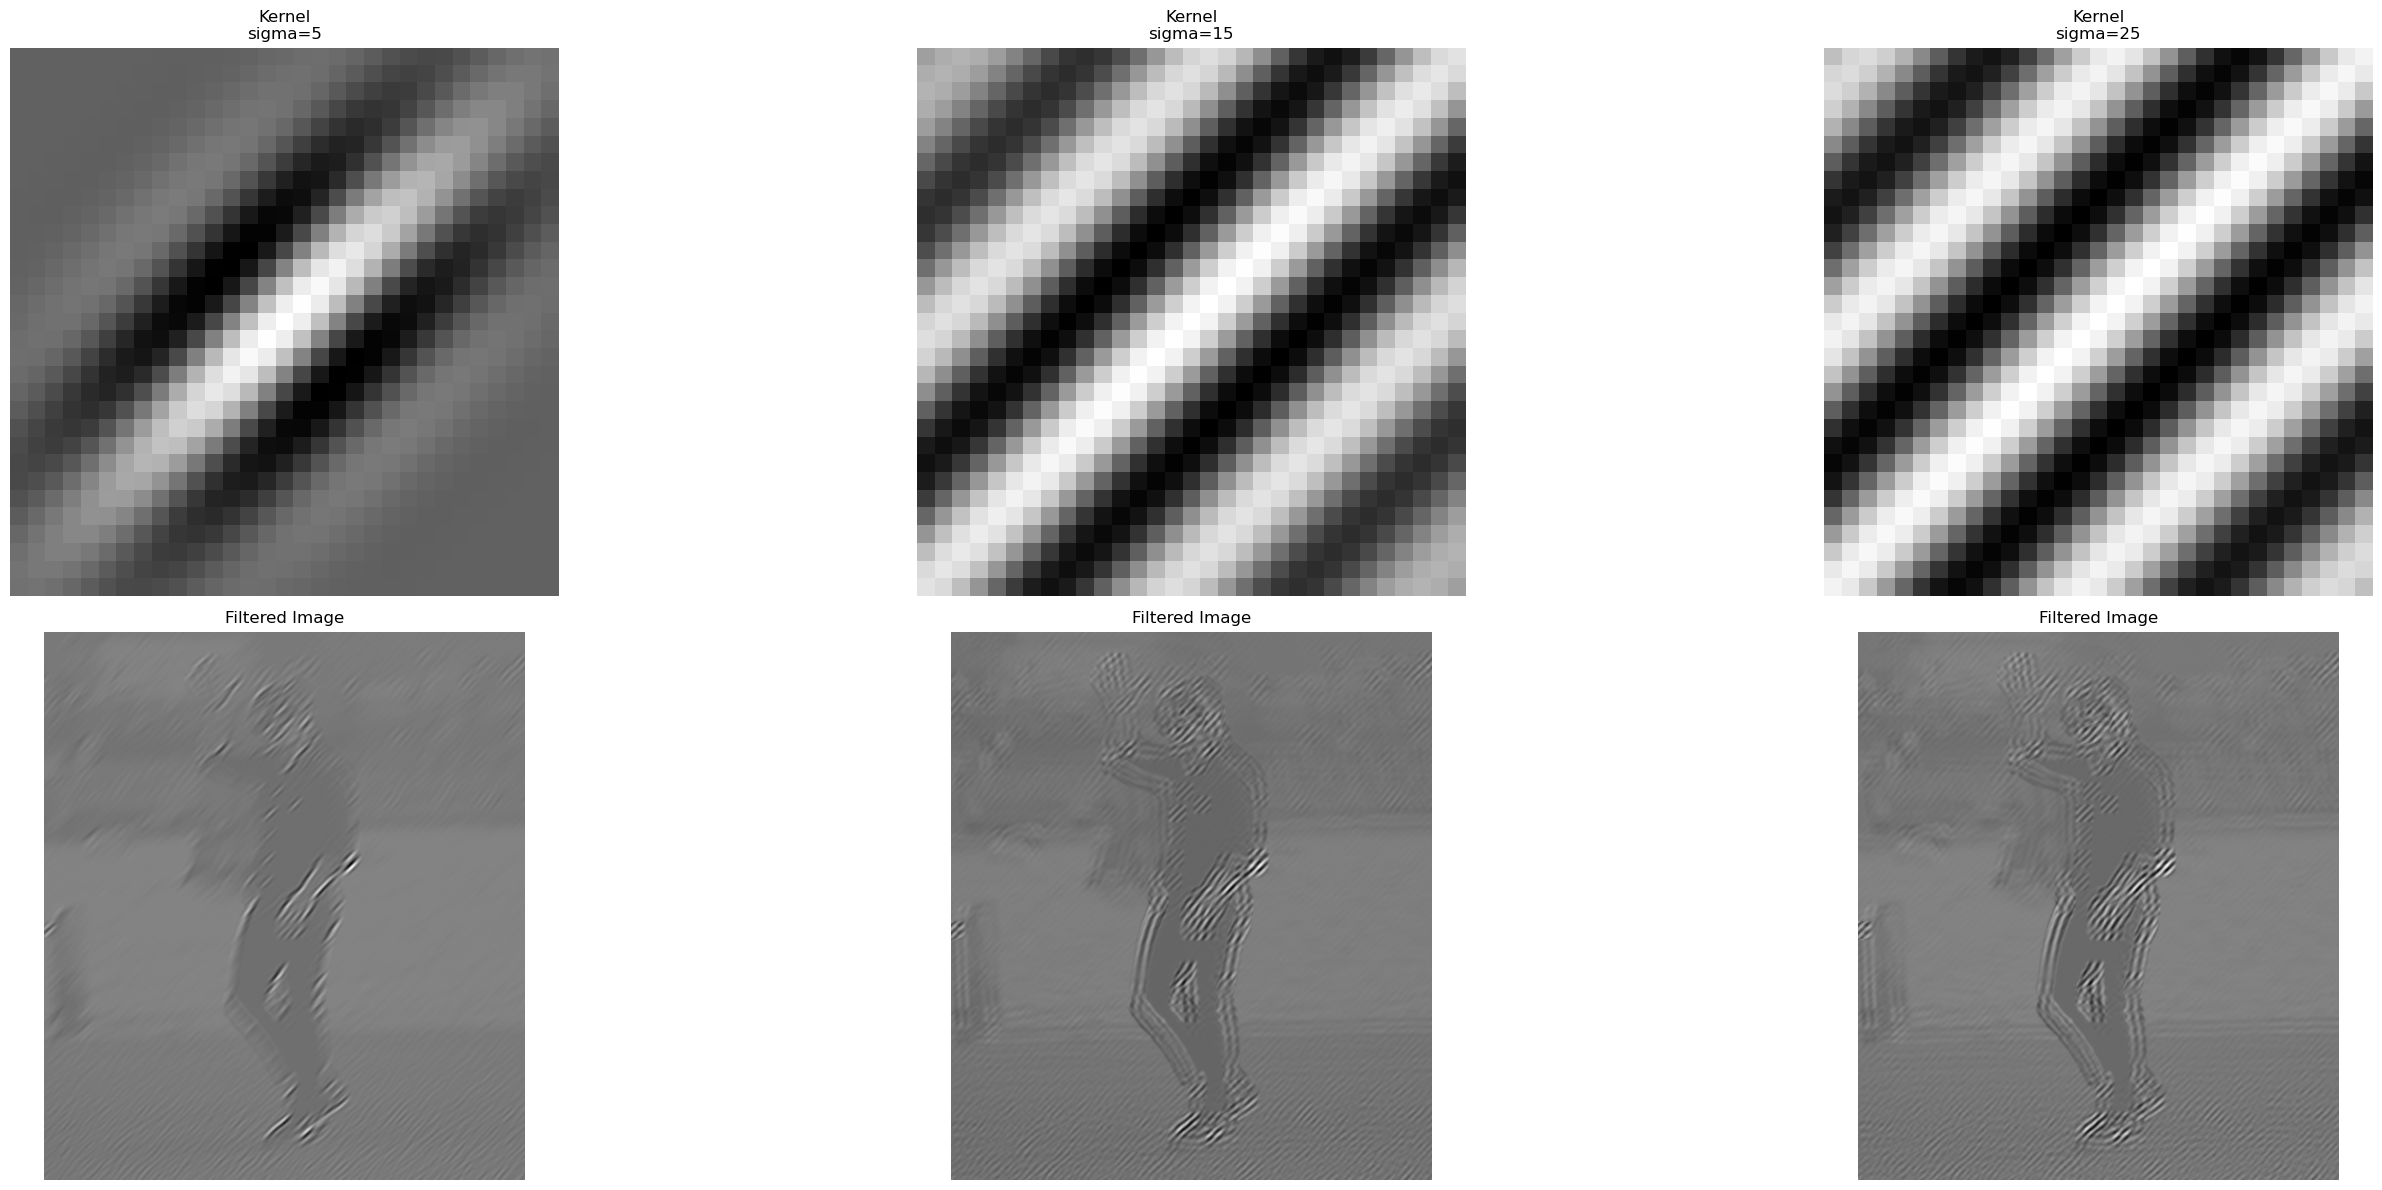


Results for varying lambd:


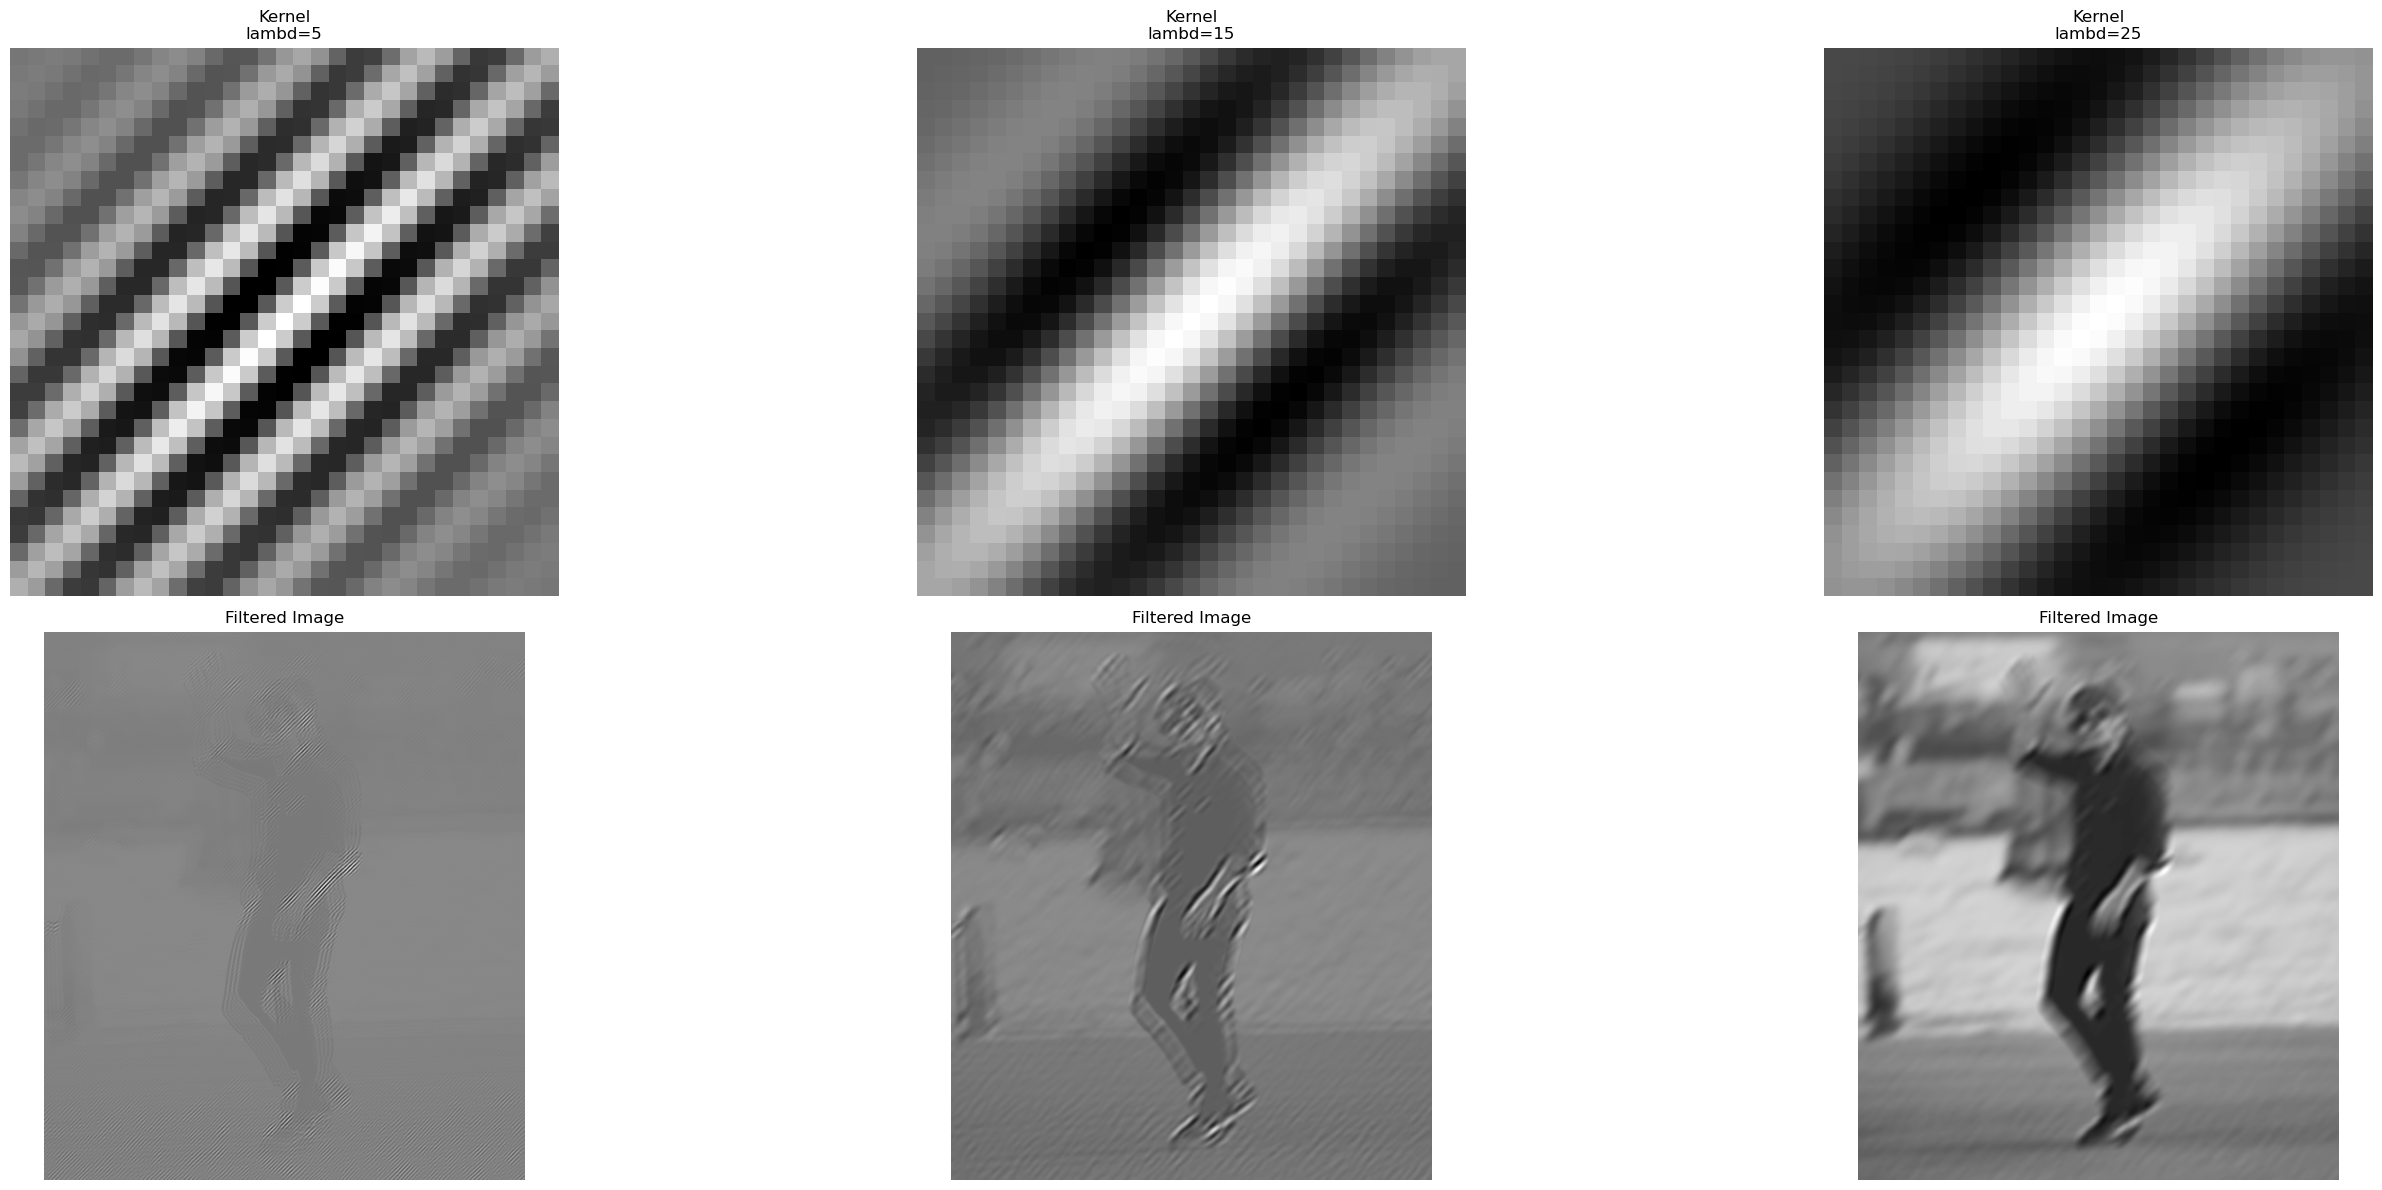


Results for varying gamma:


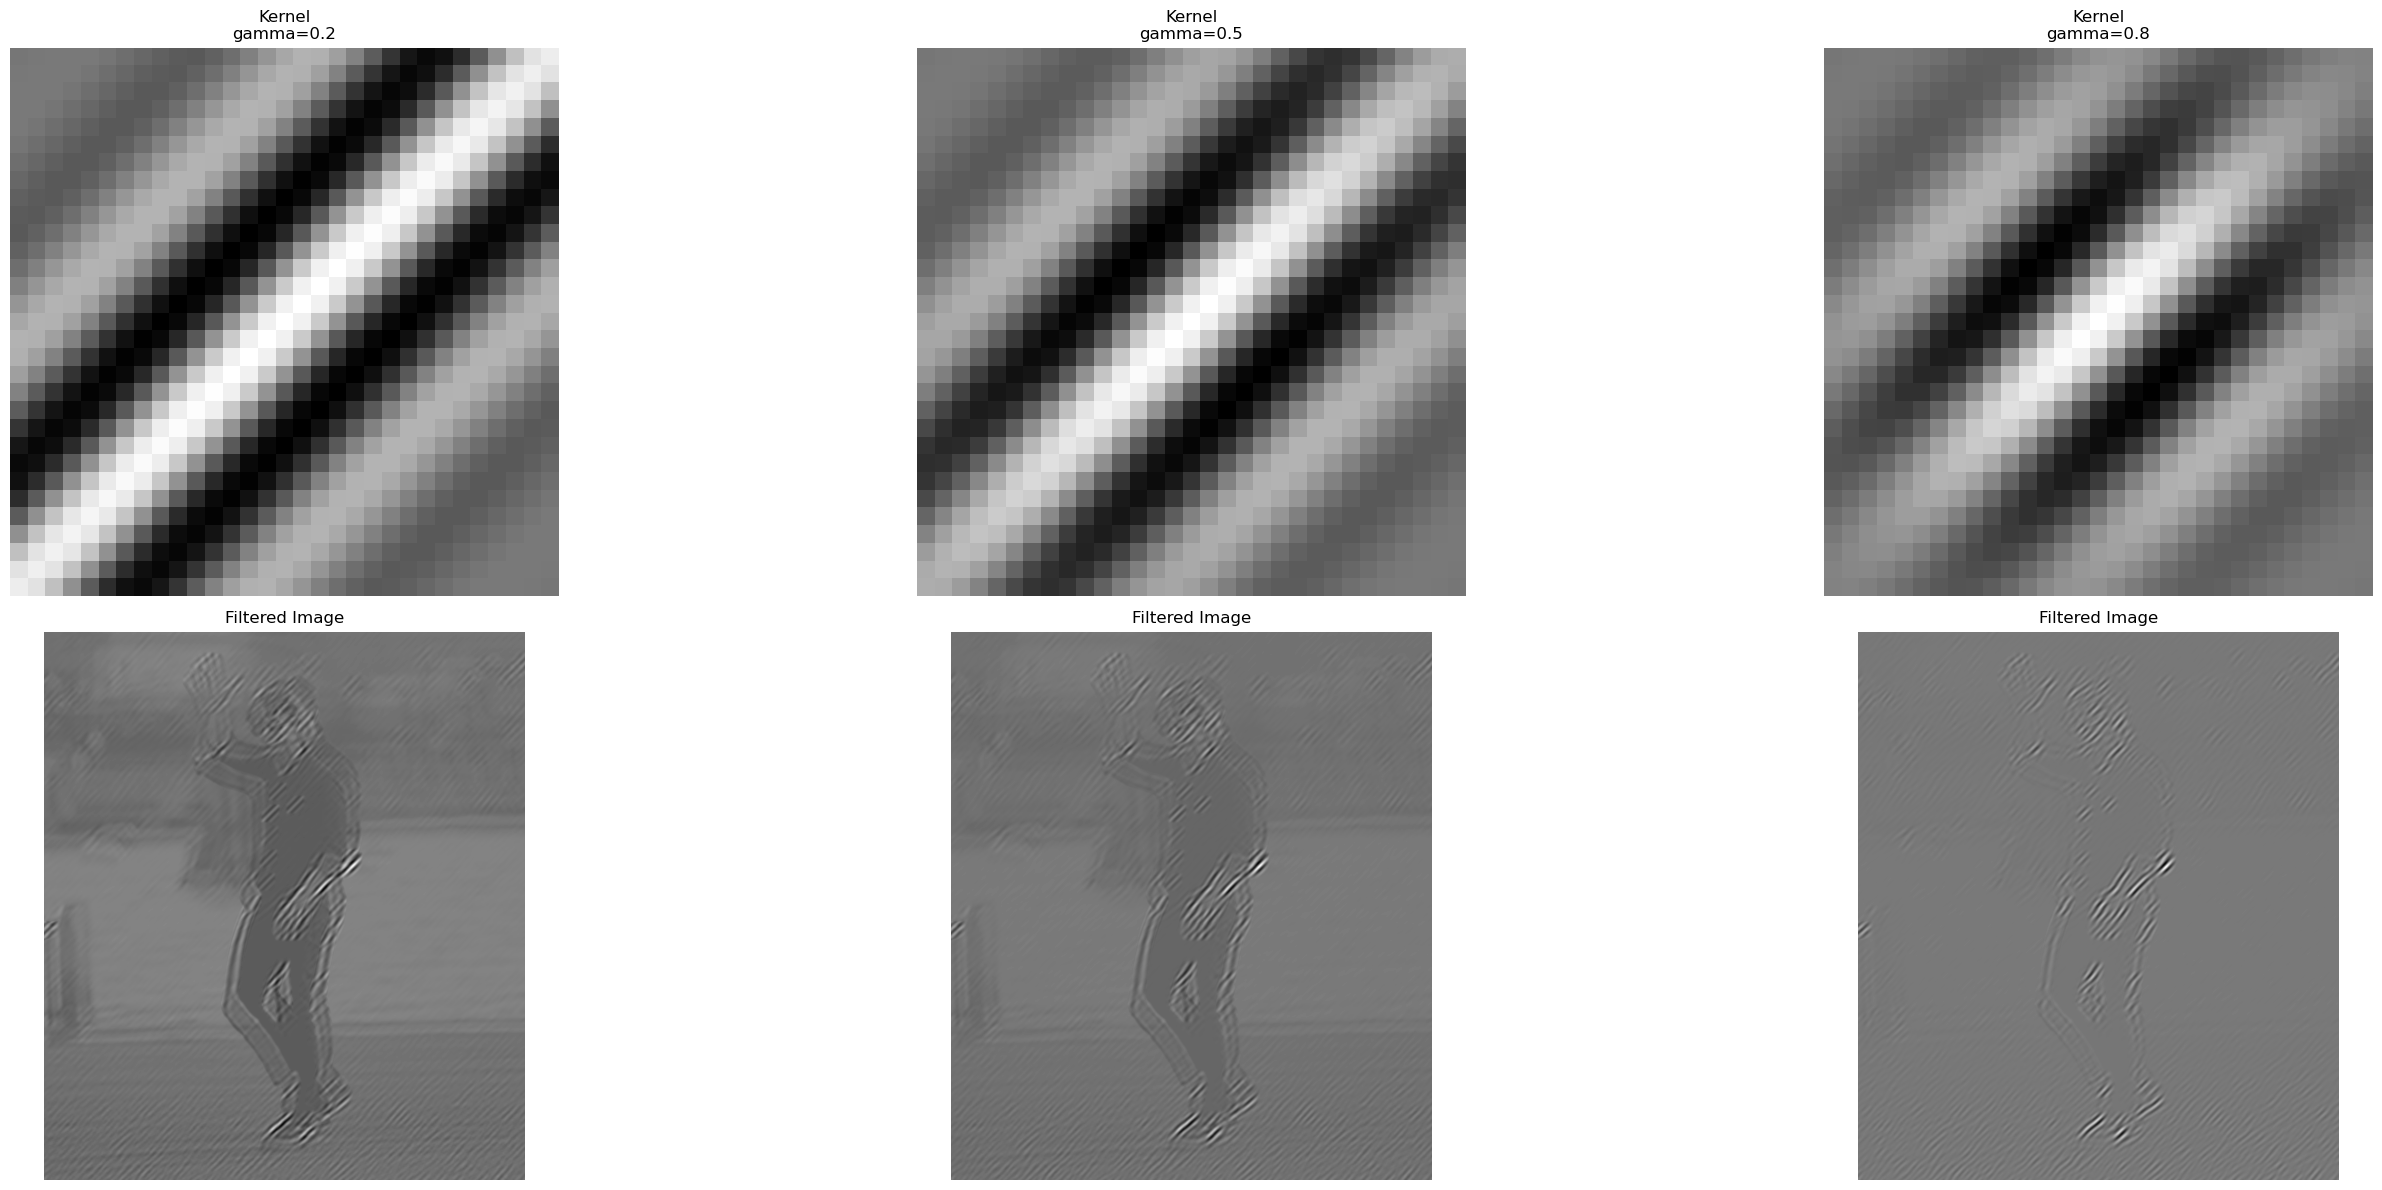

In [12]:
# Function to create and apply Gabor filter
def apply_gabor_filter(image, theta, lambd, sigma, gamma, phi=0):
    # Create Gabor kernel
    kernel = cv2.getGaborKernel((31, 31), sigma, theta, lambd, gamma, phi, ktype=cv2.CV_64F)
    
    # Apply the filter to the image
    filtered_image = cv2.filter2D(image, cv2.CV_64F, kernel)
    
    return kernel, filtered_image

# Function to visualize results
def visualize_results(image, kernels, filtered_images, params):
    num_filters = len(kernels)
    fig, axes = plt.subplots(2, num_filters, figsize=(30, 12))
    
    for i in range(num_filters):
        # Show kernel
        axes[0, i].imshow(kernels[i], cmap='gray')
        axes[0, i].set_title(f"Kernel\n{params[i]}")
        axes[0, i].axis('off')
        
        # Show filtered image
        axes[1, i].imshow(filtered_images[i], cmap='gray')
        axes[1, i].set_title("Filtered Image")
        axes[1, i].axis('off')
    
    plt.tight_layout()
    plt.show()

# Part 1: Apply Gabor filter for different angles
angles = [45, 90, 135, 180]
lambd, sigma, gamma = 10, 8, 0.5  # Fixed parameters
kernels, filtered_images, params = [], [], []

for angle in angles:
    theta = np.deg2rad(angle)  # Convert to radians
    kernel, filtered_image = apply_gabor_filter(image, theta, lambd, sigma, gamma)
    kernels.append(kernel)
    filtered_images.append(filtered_image)
    params.append(f"Theta={angle}°")

# Visualize Part 1 results
visualize_results(image, kernels, filtered_images, params)

# Part 2: Change parameters individually
parameters_to_test = [
    ("sigma", [5, 15, 25]),
    ("lambd", [5, 15, 25]),
    ("gamma", [0.2, 0.5, 0.8])
]

for param_name, values in parameters_to_test:
    kernels, filtered_images, params = [], [], []
    
    for value in values:
        if param_name == "sigma":
            kernel, filtered_image = apply_gabor_filter(image, np.deg2rad(45), lambd, value, gamma)
        elif param_name == "lambd":
            kernel, filtered_image = apply_gabor_filter(image, np.deg2rad(45), value, sigma, gamma)
        elif param_name == "gamma":
            kernel, filtered_image = apply_gabor_filter(image, np.deg2rad(45), lambd, sigma, value)
        
        kernels.append(kernel)
        filtered_images.append(filtered_image)
        params.append(f"{param_name}={value}")
    
    # Visualize Part 2 results
    print(f"\nResults for varying {param_name}:")
    visualize_results(image, kernels, filtered_images, params)


#### 1. **Varying Angles ($\theta = 45^\circ, 90^\circ, 135^\circ, 180^\circ$)**
By keeping the other parameters ($\lambda, \sigma, \gamma$) constant and changing the orientation ($\theta$), the Gabor filter becomes sensitive to features aligned with the respective angles. Applying these filters to the given image highlights edges or textures that match the filter's orientation. The kernels and their corresponding filtered images reveal how different angles capture specific patterns in the image.

#### 2. **Varying Parameters ($\sigma, \lambda, \gamma$)**
For $\theta = 45^\circ$, varying the parameters individually affects the filter as follows:

- **Changing $\sigma$**: As $\sigma$ increases, the Gaussian envelope broadens, resulting in a less localized and more global filter. The filtered image becomes smoother and captures larger-scale features. Conversely, smaller $\sigma$ values lead to finer, localized edge detection.

- **Changing $\lambda$**: Increasing $\lambda$ lowers the frequency of the sinusoidal wave, making the filter sensitive to coarser textures and larger patterns. Smaller $\lambda$ values detect finer details and higher-frequency features.

- **Changing $\gamma$**: Decreasing $\gamma$ elongates the filter in one direction, increasing its sensitivity to features in that direction. Larger $\gamma$ values produce a more circular Gaussian envelope, reducing the directionality and making the filter less sensitive to orientation-specific features.

## HOG

### Definition of HOG (Histogram of Oriented Gradients)

Histogram of Oriented Gradients (HOG) is a feature descriptor used in computer vision and image processing for object detection and recognition. It is particularly effective for detecting shapes, edges, and objects like pedestrians in images by capturing the gradient structure in localized regions.

The HOG descriptor analyzes the distribution of gradient orientations (or edge directions) in small, localized portions of the image, called cells. This process emphasizes structural and edge information while reducing the influence of illumination and color.

---

#### Mathematical Explanation of HOG

The computation of the HOG descriptor can be broken into several steps:

1. **Gradient Computation**:
   The first step involves computing the image gradient to capture intensity changes. For a grayscale image $I(x, y)$, the gradients in the $x$ and $y$ directions are computed as:

   $$
   G_x = \frac{\partial I}{\partial x}, \quad G_y = \frac{\partial I}{\partial y}.
   $$

   The gradient magnitude $M$ and orientation $\theta$ at each pixel are then calculated as:

   $$
   M = \sqrt{G_x^2 + G_y^2}, \quad \theta = \arctan\left(\frac{G_y}{G_x}\right).
   $$

2. **Orientation Binning**:
   The image is divided into small regions called cells (e.g., $8 \times 8$ pixels). For each cell, a histogram of gradient orientations is computed using the gradient magnitudes as weights. The orientation range (e.g., $0^\circ$ to $180^\circ$ or $0^\circ$ to $360^\circ$) is divided into $n$ bins (e.g., 9 bins).

   - A gradient with orientation $\theta$ contributes to the histogram bin corresponding to its angle.
   - The magnitude $M$ is used as the weight for the bin.

   For example, a cell's histogram might look like:
   $$
   H = [h_1, h_2, \ldots, h_n],
   $$
   where $h_i$ represents the sum of magnitudes for gradients falling into bin $i$.

3. **Normalization Across Blocks**:
   To achieve illumination invariance, the histograms from neighboring cells are grouped into overlapping blocks (e.g., $2 \times 2$ cells per block). The feature vector for a block is obtained by concatenating the histograms of its constituent cells.

   The block's feature vector is normalized to ensure consistency across varying lighting conditions. Common normalization methods include:

   - **L2 Norm**:
     $$
     v' = \frac{v}{\sqrt{\|v\|_2^2 + \epsilon^2}},
     $$
     where $v$ is the unnormalized feature vector, and $\epsilon$ is a small constant to avoid division by zero.

   - **L1 Norm**:
     $$
     v' = \frac{v}{\|v\|_1 + \epsilon}.
     $$

   This step produces the final HOG descriptor for the block, which is robust to lighting and contrast changes.

4. **Feature Vector**:
   The normalized histograms from all blocks are concatenated into a single feature vector, which serves as the image’s HOG descriptor. The length of this vector depends on:
   - The number of cells in the image.
   - The number of orientation bins.
   - The size and overlap of blocks.

---

#### Parameters of HOG

1. **Orientations** ($n$): 
   The number of bins in the histogram of gradient orientations (e.g., 9 bins for angles $0^\circ$ to $180^\circ$).

2. **Pixels per Cell**:
   The size of each cell (e.g., $8 \times 8$ pixels). Smaller cells capture finer details but increase computational cost.

3. **Cells per Block**:
   The size of the block used for normalization (e.g., $2 \times 2$ cells per block). Larger blocks smooth over more variations but reduce local sensitivity.

4. **Block Normalization**:
   The normalization method, such as L2-norm or L1-norm, ensures robustness to lighting changes.

5. **Visualization**:
   HOG can be visualized as an image by displaying the gradient orientations and their magnitudes for each cell. This visualization provides an intuitive understanding of how the descriptor captures structural information.

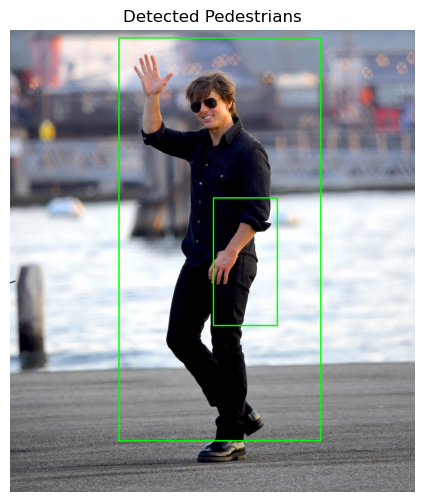

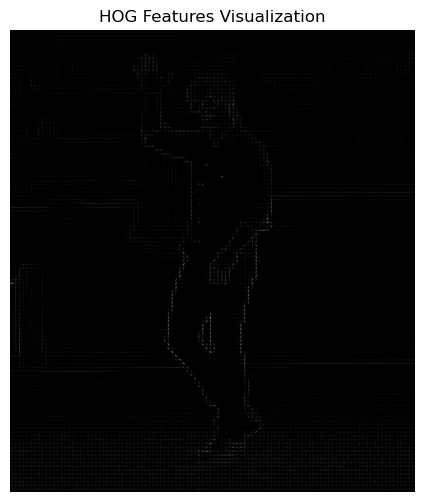

In [ ]:
# Initialize the HOG descriptor and set the SVM detector to a pre-trained pedestrian detector
image_RGB = rgb_images[0]  # Use your RGB image
image_gray = cv2.cvtColor(image_RGB, cv2.COLOR_BGR2GRAY)  # Convert to grayscale for HOG computation

hog_cv2 = cv2.HOGDescriptor()
hog_cv2.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

# Detect people in the image
rects, weights = hog_cv2.detectMultiScale(image_gray, 
                                          winStride=(8, 8), 
                                          padding=(8, 8), 
                                          scale=1.05)

# Filter detections based on a confidence threshold
threshold = 0.2
rects_filtered = [rect for rect, weight in zip(rects, weights) if weight > threshold]

# Draw the detected bounding boxes on the original image
image_with_boxes = image_RGB.copy()
for (x, y, w, h) in rects_filtered:
    cv2.rectangle(image_with_boxes, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the image with detected pedestrians
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB))
plt.title("Detected Pedestrians")
plt.axis("off")
plt.show()

# Compute HOG using skimage for visualization
hog_features, hog_image = hog(image_gray, 
                               orientations=9, 
                               pixels_per_cell=(8, 8),
                               cells_per_block=(2, 2), 
                               block_norm='L2-Hys', 
                               visualize=True, 
                               feature_vector=True)

# Display the HOG visualization
plt.figure(figsize=(10, 6))
plt.imshow(hog_image, cmap='gray')
plt.title("HOG Features Visualization")
plt.axis("off")
plt.show()

## HOG for classification

### Explanation for Designing a HOG Descriptor and Classifying Facial Emotions (Happy vs. Disgust):

#### **1. Problem Overview**  
The task is to design a system that uses Histogram of Oriented Gradients (HOG) as a feature descriptor to classify two facial emotions: **happy** and **disgust**. The classification is performed using Support Vector Machines (SVMs). The images are preprocessed to isolate facial regions using appropriate masks, and the entire face is treated as a single detection window since the goal is classification, not object localization.

---

#### **2. Dataset Preparation**  
- **Dataset Splitting**: The dataset consists of 100 images, with 65 belonging to the *happy* class and 35 to the *disgust* class. For training and testing:
  - **Training Set**: Randomly select 65 images from the *happy* class and 35 from the *disgust* class.
  - **Test Set**: The remaining images form the test set.
- The split is randomized for reproducibility, ensuring the model does not overfit to specific subsets.

---

#### **3. Preprocessing and Masking**  
Facial masks are applied to isolate facial regions, minimizing the impact of background noise. This ensures the extracted features focus on facial attributes relevant to emotions.

---

#### **4. HOG Feature Extraction**  
HOG transforms the facial image into a feature vector by summarizing its gradient structure:
1. **Gradients Calculation**: Gradients of the image are computed for intensity changes in both the horizontal and vertical directions.
2. **Orientation Binning**: The gradient orientations are quantized into 9 bins (e.g., 0° to 180°).
3. **Cell Division**:
   - The image is divided into small, non-overlapping **cells** (e.g., $8 \times 8$ pixels). For each cell, a histogram of gradient orientations is calculated.
4. **Block Normalization**:
   - To account for variations in lighting and contrast, the histograms of neighboring cells are grouped into **blocks** (e.g., $2 \times 2$ cells).
   - These blocks overlap to ensure spatial continuity.
   - L2-Hys normalization is applied for robust features.
5. **Feature Vector Creation**:
   - The concatenated histograms across all cells and blocks create a feature vector for the image.

Parameters such as cell size, block size, and overlap percentage are tuned for optimal performance:
- **Cell Size**: $8 \times 8$ pixels.
- **Block Size**: $2 \times 2$ cells.
- **Number of Orientation Bins**: 9.

---

#### **5. Classification with SVM**  
Support Vector Machines are trained to distinguish between the two emotions using the extracted HOG features:
1. **Feature-Label Pairing**:
   - Assign labels to the features: 1 for *happy* and 0 for *disgust*.
   - Combine features and labels into training and testing datasets.
2. **Hyperparameter Tuning**:
   - SVM parameters such as the regularization factor ($C$) and kernel type (linear, polynomial, RBF) are optimized using grid search with 5-fold cross-validation on the training data.
   - For non-linear kernels, additional parameters like the kernel coefficient ($\gamma$) are tuned.
3. **Model Training**:
   - The best-performing SVM is selected based on cross-validation accuracy.
4. **Evaluation**:
   - The trained model is evaluated on the test dataset using metrics like precision, recall, F1-score, and the confusion matrix.


In [90]:
# Separate train and test datasets using indices
def create_train_test_split(happy, disgust, happy_train_size=65, disgust_train_size=35):
    random.seed(42)  # For reproducibility
    
    # Get indices for training and testing
    happy_indices = list(range(len(happy)))
    disgust_indices = list(range(len(disgust)))
    
    happy_train_indices = random.sample(happy_indices, happy_train_size)
    disgust_train_indices = random.sample(disgust_indices, disgust_train_size)
    
    # Get the remaining indices for testing
    happy_test_indices = list(set(happy_indices) - set(happy_train_indices))
    disgust_test_indices = list(set(disgust_indices) - set(disgust_train_indices))
    
    # Use the indices to split the datasets
    happy_train = [happy[i] for i in happy_train_indices]
    happy_test = [happy[i] for i in happy_test_indices]
    disgust_train = [disgust[i] for i in disgust_train_indices]
    disgust_test = [disgust[i] for i in disgust_test_indices]
    
    return happy_train, happy_test, disgust_train, disgust_test

# Extract HOG features for a dataset
def extract_hog_features(images, cell_size=(8, 8), block_size=(2, 2), nbins=9):
    hog_features = []
    for image in images:
        features = hog(
            image,
            orientations=nbins,
            pixels_per_cell=cell_size,
            cells_per_block=block_size,
            block_norm='L2-Hys',
            visualize=False,
            transform_sqrt=True
        )
        hog_features.append(features)
    return np.array(hog_features)

# Prepare data for SVM
def prepare_data_for_svm(happy_data, disgust_data):
    labels_happy = np.ones(len(happy_data))
    labels_disgust = np.zeros(len(disgust_data))
    features = np.vstack([happy_data, disgust_data])
    labels = np.hstack([labels_happy, labels_disgust])
    return features, labels

# Main workflow
# Split into train and test
happy_train, happy_test, disgust_train, disgust_test = create_train_test_split(
    gray_image_h_m, gray_image_d_m
)

# Extract HOG features
hog_train_happy = extract_hog_features(happy_train)
hog_train_disgust = extract_hog_features(disgust_train)
hog_test_happy = extract_hog_features(happy_test)
hog_test_disgust = extract_hog_features(disgust_test)

# Prepare SVM data
X_train, y_train = prepare_data_for_svm(hog_train_happy, hog_train_disgust)
X_test, y_test = prepare_data_for_svm(hog_test_happy, hog_test_disgust)

# Train SVM using GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']  # Only relevant for non-linear kernels
}
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best model and evaluation
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Results
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Best SVM Parameters:", grid_search.best_params_)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)


Best SVM Parameters: {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}

Confusion Matrix:
 [[12  0]
 [ 0 20]]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        12
         1.0       1.00      1.00      1.00        20

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



In [91]:
# Separate train and test datasets using indices
def create_train_test_split(happy, disgust, happy_train_size=30, disgust_train_size=30):
    random.seed(42)  # For reproducibility
    
    # Get indices for training and testing
    happy_indices = list(range(len(happy)))
    disgust_indices = list(range(len(disgust)))
    
    happy_train_indices = random.sample(happy_indices, happy_train_size)
    disgust_train_indices = random.sample(disgust_indices, disgust_train_size)
    
    # Get the remaining indices for testing
    happy_test_indices = list(set(happy_indices) - set(happy_train_indices))
    disgust_test_indices = list(set(disgust_indices) - set(disgust_train_indices))
    
    # Use the indices to split the datasets
    happy_train = [happy[i] for i in happy_train_indices]
    happy_test = [happy[i] for i in happy_test_indices]
    disgust_train = [disgust[i] for i in disgust_train_indices]
    disgust_test = [disgust[i] for i in disgust_test_indices]
    
    return happy_train, happy_test, disgust_train, disgust_test

# Extract HOG features for a dataset
def extract_hog_features(images, cell_size=(8, 8), block_size=(2, 2), nbins=9):
    hog_features = []
    for image in images:
        features = hog(
            image,
            orientations=nbins,
            pixels_per_cell=cell_size,
            cells_per_block=block_size,
            block_norm='L2-Hys',
            visualize=False,
            transform_sqrt=True
        )
        hog_features.append(features)
    return np.array(hog_features)

# Prepare data for SVM
def prepare_data_for_svm(happy_data, disgust_data):
    labels_happy = np.ones(len(happy_data))
    labels_disgust = np.zeros(len(disgust_data))
    features = np.vstack([happy_data, disgust_data])
    labels = np.hstack([labels_happy, labels_disgust])
    return features, labels

# Main workflow
# Split into train and test
happy_train, happy_test, disgust_train, disgust_test = create_train_test_split(
    gray_image_h_m, gray_image_d_m
)

# Extract HOG features
hog_train_happy = extract_hog_features(happy_train)
hog_train_disgust = extract_hog_features(disgust_train)
hog_test_happy = extract_hog_features(happy_test)
hog_test_disgust = extract_hog_features(disgust_test)

# Prepare SVM data
X_train, y_train = prepare_data_for_svm(hog_train_happy, hog_train_disgust)
X_test, y_test = prepare_data_for_svm(hog_test_happy, hog_test_disgust)

# Train SVM using GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']  # Only relevant for non-linear kernels
}
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best model and evaluation
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Results
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Best SVM Parameters:", grid_search.best_params_)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)


Best SVM Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}

Confusion Matrix:
 [[16  1]
 [ 2 53]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.94      0.91        17
         1.0       0.98      0.96      0.97        55

    accuracy                           0.96        72
   macro avg       0.94      0.95      0.94        72
weighted avg       0.96      0.96      0.96        72



#### **1. Results**  
1. **Classification Performance**:
   - In initial experiments, overly large training datasets led to 100% accuracy, suggesting potential overfitting.
   - Reducing the size of the training dataset resulted in more balanced and realistic accuracy (e.g., 96%).
2. **Confusion Matrix**:
   - The confusion matrix shows the model's performance in identifying *happy* and *disgust* images.
   - Example: 16 true positives for *disgust* and 53 true positives for *happy* with minimal false classifications.

---

#### **2. Key Insights**  
1. **HOG Strength**: The gradient-based nature of HOG makes it highly effective in capturing texture and structural differences, which are crucial for distinguishing facial emotions.
2. **Parameter Tuning**: Parameters such as cell size, block size, and SVM kernel significantly impact classification performance.
3. **Generalization**: Properly masking irrelevant areas and using cross-validation ensures the model generalizes well to unseen data.

By combining HOG and SVM, this system provides an efficient pipeline for emotion classification from facial images.